In [34]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl

mpl.rcParams['font.size'] = 12

In [35]:
years = list(range(2010, 2024))
data_list = []
for i in years:
    df = pd.read_csv("../../Data/Data/data_" + str(i) + ".csv")
    data_list.append(df)

In [36]:
nan_df = data_list[0][["GEOIDFQ", "NaN count"]].rename(columns={"NaN count": "NaN count 2010"})
nan_df["NaN count"] = 0
nan_df = nan_df[["GEOIDFQ", "NaN count", "NaN count 2010"]]

for i in range(1, len(years)):
    df = data_list[i][['GEOIDFQ', 'NaN count']]
    nan_df = nan_df.merge(df, on='GEOIDFQ', how='inner', suffixes=('', " " + str(years[i])))
    nan_df["NaN count"] += nan_df["NaN count " + str(years[i])]

nan_df = nan_df.drop(nan_df.nlargest(3, "NaN count").index)

#nan_df

In [37]:
n_common_ids = nan_df.shape[0]
n_features_read = 90

print(n_common_ids, n_features_read)

3096 90


In [38]:
nan = []
for i in years:
    avg_nan = nan_df["NaN count " + str(i)].sum()
    nan.append(avg_nan)

#nan

In [39]:
label = "Excluding: " \
        "\n   'Households: with computer   [%]' 2010-2016 " \
        "\n   'Households: with broadband [%]' 2010-2016 " \
        "\n   'Health insurance coverage    [%]' 2010-2011 " \
        "\nExcluding: County over 0.04 (NaN per Column and Year)"

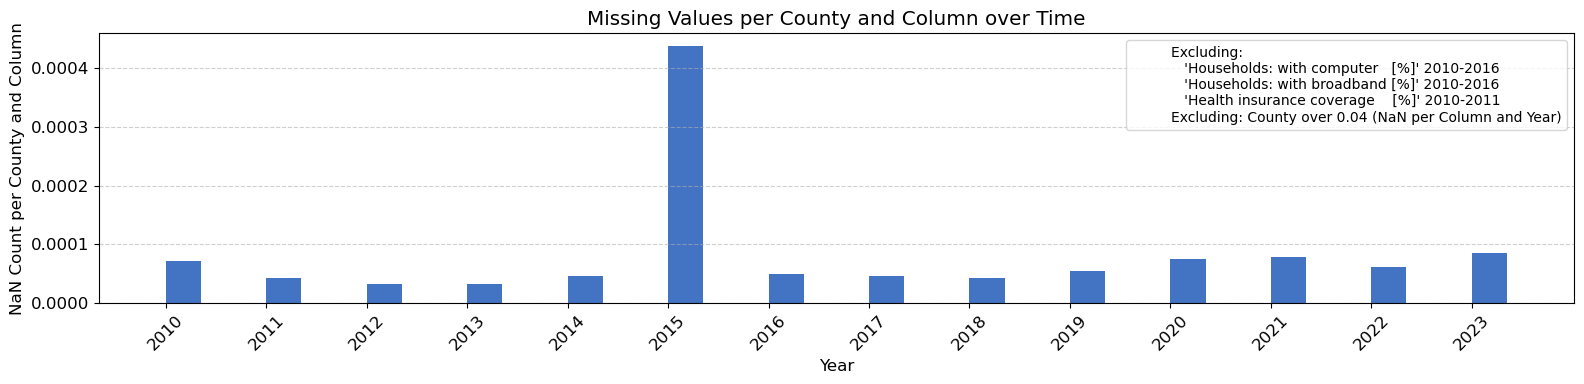

In [66]:
x = np.arange(len(years))
width = 0.35

plt.figure(figsize=(16, 4))
plt.bar(x + width/2, np.array(nan) / n_common_ids / n_features_read, width, label=label, color='#4373c3')

plt.xlabel("Year")
plt.ylabel("NaN Count per County and Column")
plt.title("Missing Values per County and Column over Time")
plt.xticks(x, years, rotation=45)
plt.tight_layout()
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
patch = mpatches.Patch(color='none', label=label)
plt.legend(handles=[patch], loc='upper right', fontsize=10)
plt.show()

In [41]:
gdf = gpd.read_file("../../Data/Shapefiles/tl_2023_us_county.shp")
gdf = gdf.merge(nan_df, on="GEOIDFQ", how="inner")

In [42]:
gdf["NaN count (normalized)"] = gdf["NaN count"] / n_features_read / len(years)

gdf["NaN count (normalized)"].nlargest(10)

2448    0.008730
455     0.007143
2171    0.007143
1243    0.006349
1849    0.006349
285     0.005556
1850    0.004762
2532    0.004762
998     0.003968
1022    0.003968
Name: NaN count (normalized), dtype: float64

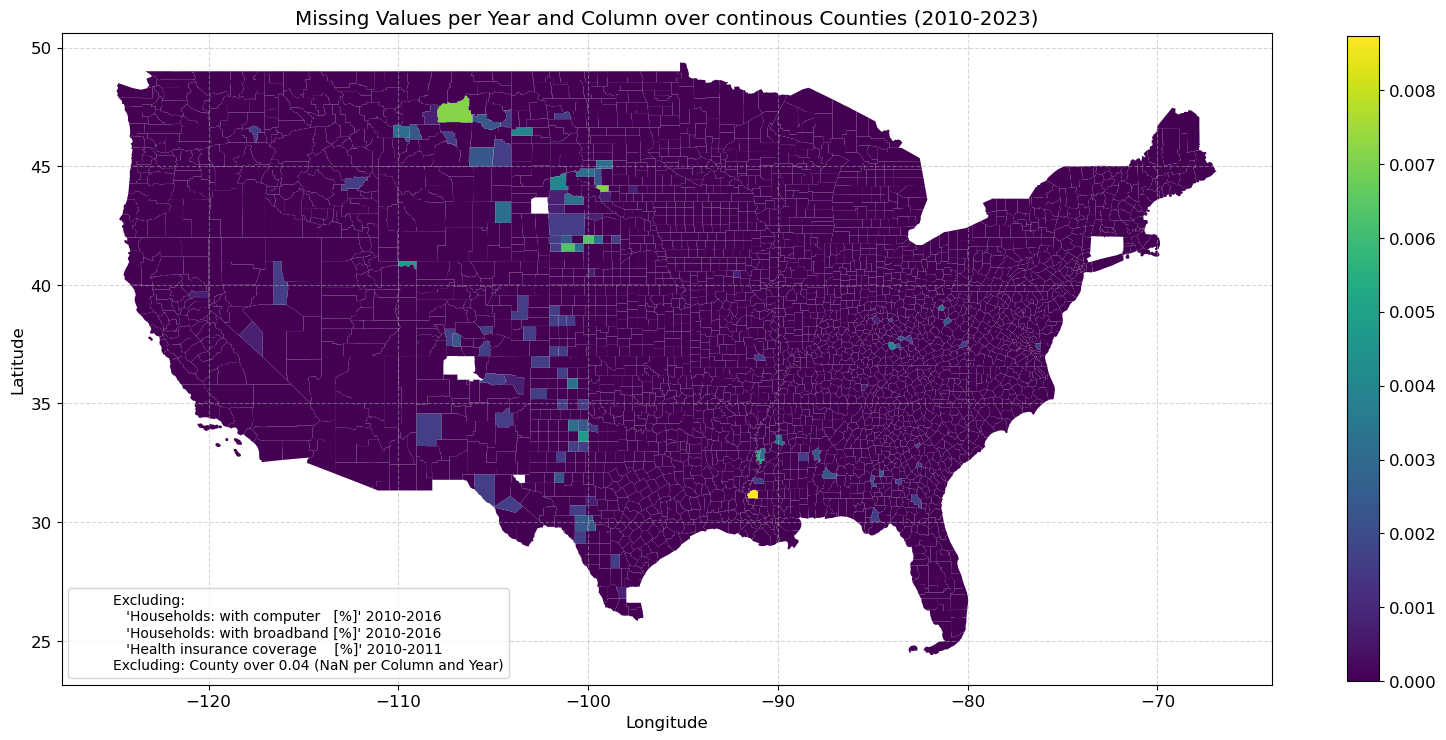

In [47]:
fig, ax = plt.subplots(figsize=(16, 8))

gdf.plot(column="NaN count (normalized)", cmap="viridis", legend=True, ax=ax, legend_kwds={'shrink': 0.85})

ax.set_title("Missing Values per Year and Column over continous Counties (2010-2023)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

patch = mpatches.Patch(color='none', label=label)
plt.legend(handles=[patch], loc='lower left', fontsize=10)

plt.show()